In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import time
import re

In [2]:
df = pd.read_excel("Raw Key Swipe Data.xlsx",sheetname = "Data",header = 5)

In [5]:
df.columns = ["Event DateTime","Event","Device Location","Card Number"]

#### Dropped Page Breaks

In [ ]:
# Total of 17393 page breaks dropped

In [6]:
len(df) - len(df.dropna(axis = 0))

17393

In [7]:
df.dropna(axis = 0,inplace=True)

In [8]:
len(df)

390127

#### Drop rows with illegable dates

In [9]:
datetime.datetime.strptime(df["Event DateTime"].iloc[0],"%m/%d/%Y %I:%M %p")

datetime.datetime(2016, 5, 1, 1, 11)

In [10]:
df["Event DateTime"].iloc[0]

'5/1/2016 1:11 AM'

In [11]:
cleanDate = []
dirtyDate = []
for x in df["Event DateTime"]:
    try:
        cleanDate.append(datetime.datetime.strptime(x,"%m/%d/%Y %I:%M %p"))
    except:
        dirtyDate.append(x)

In [12]:
min(cleanDate)

datetime.datetime(2016, 5, 1, 1, 11)

In [13]:
max(cleanDate)

datetime.datetime(2016, 10, 12, 14, 4)

In [14]:
dateList = []
for x in df["Event DateTime"]:
    try:
        dateList.append(datetime.datetime.strptime(x,"%m/%d/%Y %I:%M %p"))
    except:
        dateList.append(np.nan)

df["Clean DateTime"] = dateList

In [ ]:
# 46 Rows of dirty date data dropped from dataframe

In [15]:
len(df) - len(df.dropna(axis=0))

46

In [16]:
df.dropna(axis=0,inplace=True)

#### Drop Rows after 10/9/2016

In [ ]:
# Total of 5012 rows removed

In [17]:
len(df[df["Clean DateTime"] > datetime.datetime(2016, 10, 9, 0, 0)])

5012

In [18]:
df = df[df["Clean DateTime"] < datetime.datetime(2016, 10, 9, 0, 0)]

#### Drop Rows of partial week

In [254]:
df = df[df["Week Number"] != 17]

#### Add parsed date columns for grouping

In [19]:
df["Date"] = df["Clean DateTime"].apply(lambda x: x.date())
df["Time"] = df["Clean DateTime"].apply(lambda x: x.time())
df["Month"] = df["Clean DateTime"].apply(lambda x: x.month)
df["Day"] = df["Clean DateTime"].apply(lambda x: x.day)
df["Hour"] = df["Clean DateTime"].apply(lambda x: x.hour)

In [20]:
month = {
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October"
}

newMonth = []
for x in df["Month"]:
    newMonth.append(month[x])
    
df["Month"] = newMonth

#### Drop Old Date Time Stamp

In [21]:
df.drop("Event DateTime",axis=1,inplace = True)

#### Turn Card Number to Int data type from float

In [24]:
cardNumber = []
for x in df["Card Number"]:
    cardNumber.append(int(x))

df["Card Number"] = cardNumber

#### Set DateTime to Index

In [25]:
df.set_index("Clean DateTime", inplace = True)

# Building Code Merge

#### Split device location to Building Code

In [96]:
df["Device Location"].apply(lambda x: x.split("_")[0])[:10]

Clean DateTime
2016-05-01 01:11:00      PWTP
2016-05-01 01:42:00     MSY01
2016-05-01 01:56:00    AWQL01
2016-05-01 01:56:00    AWQL01
2016-05-01 01:57:00    AWQL01
2016-05-01 01:57:00    AWQL01
2016-05-01 01:57:00    AWQL01
2016-05-01 01:57:00    AWQL01
2016-05-01 01:57:00    AWQL01
2016-05-01 01:58:00    AWQL01
Name: Device Location, dtype: object

In [104]:
def my_split(x):
    y = (re.split(r'(\d+)',x)[0])
    try:
        z = y.split("_")[0]
    except:
        pass
    return(z)

In [106]:
buildingCode = []
for x in df["Device Location"]:
    buildingCode.append(my_split(x))

In [107]:
df["Building Code"] = buildingCode

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [186]:
os.chdir("/Users/adeniyiharrison/Desktop/Key Swipe Data")
buildingCode = pd.read_excel("Building Codes.xlsx",sheetname = "Floors",header = 8)

In [189]:
buildingCodeList = buildingCode["Building Code"].unique().tolist()

### Replace Building Code of Keyswipe data to keys found in Building Code Document

#### Blossom Hill Annex

In [144]:
df["Building Code"].replace("BHA","BH",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Silicon Valley Advanced Water Purification Center 

In [155]:
df["Building Code"].replace("SVAWPC","SVAWPC-B",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Coyote Pumping Plant

In [163]:
df["Building Code"].replace("CP","CPP-O1",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Vasona Pumping Station (Plant)

In [168]:
df["Building Code"].replace("VP","VAS 1",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Pacheco Pumping Station (Plant)

In [173]:
df["Building Code"].replace("PP","PPS",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Water Quality Lab

In [205]:
df["Building Code"].replace("AWQL","WQL",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Watershed Vegetation Maintenance

In [218]:
df["Building Code"].replace("VM","WVM",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Crest Building

In [488]:
df["Building Code"].replace("ACS","CR",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Maintainance Shop Yard

In [489]:
df["Building Code"].replace("MSY","MS",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### IT Warehouse (Facilities Annex Building)

In [490]:
df["Building Code"].replace("ITW", "ADM_ANEX",inplace = True)

//anaconda/lib/python3.5/site-packages/pandas/core/generic.py:3547: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [491]:
exist = []
notExist = []
for x in df["Building Code"].unique().tolist():
    if x in buildingCodeList:
        exist.append(x)
    else:
        notExist.append(x)

#### Building Code Exists in Building Code Excel Doc from Mike

In [492]:
exist

['MS',
 'ADM_ANEX',
 'STWTP',
 'WQL',
 'BH',
 'WW',
 'WVM',
 'SVAWPC-B',
 'RWTP',
 'PWTP',
 'MO',
 'ADM',
 'HQ',
 'CR',
 'CPP-O1',
 'VAS 1',
 'PPS']

In [493]:
df[df["Building Code"].isin(exist)]["Building Code"].value_counts()

HQ          136116
ADM          74439
CR           41680
WQL          37179
MO           27289
BH           20847
RWTP          7311
STWTP         5570
VAS 1         5396
WW            5150
MS            4641
ADM_ANEX      4582
CPP-O1        4520
PWTP          3890
SVAWPC-B      3089
WVM           1966
PPS            573
Name: Building Code, dtype: int64

#### Building Code does not Exist in Building Code Excel Doc from Mike

#### Described As "Vaults in the Field" by Mike

In [495]:
df[df["Building Code"].isin(notExist)]["Building Code"].value_counts()

AB    182
SF    160
CO    142
AF     26
BI      9
Name: Building Code, dtype: int64

### Building Codes not found in Keyswipe Data

In [496]:
keyswipeExist = []
keyswipeNotExist = []
for x in buildingCodeList:
    if x in df["Building Code"].unique():
        keyswipeExist.append(x)
    else:
        keyswipeNotExist.append(x)

## Coordinates

In [497]:
coordinates = [
    {"Building Name": "Penitencia Water Treatment Plant", "Building Code":"PWTP", "Lat":37.398410, "Long":-121.835311},
    {"Building Name": "Water Quality Lab" , "Building Code": "WQL" , "Lat": 37.250534 , "Long": -121.871583},
    {"Building Name": "Blossom Hill Annex" , "Building Code": "BH" , "Lat": 37.250144 , "Long": -121.870994},
    {"Building Name": "Winfield Warehouse", "Building Code": "WW" , "Lat": 37.245630 , "Long": -121.869244},
    {"Building Name": "Watershed Vegetation Maintenance", "Building Code": "WVM", "Lat": 37.244771, "Long": -121.870043},
    {"Building Name": "Silicon Valley Advanced Water Purification Center ", "Building Code": "SVAWPC-B", "Lat": 37.425427, "Long": -121.940292},
    {"Building Name": "Maintenance Office", "Building Code": "MO", "Lat": 37.245724, "Long": -121.874301},
    {"Building Name": "Headquarters", "Building Code": "HQ", "Lat": 37.248494, "Long": -121.873466},
    {"Building Name": "Santa Teresa Water Treatment Plant", "Building Code": "STWTP", "Lat": 37.220157, "Long": -121.836416},
    {"Building Name": "Administration Building", "Building Code": "ADM", "Lat": 37.246324, "Long": -121.873464},
    {"Building Name": "Rinconada Water Treatment Plant", "Building Code": "RWTP", "Lat": 37.256208, "Long": -121.984239},
    {"Building Name": "Coyote Pumping Plant", "Building Code": "CPP-O1", "Lat": 37.158117, "Long": -121.637423},
    {"Building Name": "Vasona Pumping Station", "Building Code": "VAS 1", "Lat": 37.255688, "Long": -121.958463},
    {"Building Name": "Crest Building", "Building Code": "CR", "Lat": 37.248822, "Long":  -121.874560},
    {"Building Name": "Maintainance Shop Yard", "Building Code": "MS", "Lat": 37.248557, "Long": -121.874865},
    {"Building Name": "Administation Annex (Fac. Annex)", "Building Code": "ADM_ANEX", "Lat": 37.248522, "Long": -121.874608}
]

In [500]:
coordinates = pd.DataFrame(coordinates)

In [502]:
df = df.merge(coordinates,how = "left",left_on = "Building Code",right_on = "Building Code")

In [504]:
df.head()

,Date,Week Number,Month,Day,Time,Hour,Event,Device Location,Card Number,Building Code,Day of Week,Building Name,Lat,Long
0,2016-05-02,18,May,2,00:21:00,0,Deactivated Card\nAttempt,MSY01_CR.01-\nBreak Room DR,10912,MS,Monday,Maintainance Shop Yard,37.248557,-121.874865
1,2016-05-02,18,May,2,00:21:00,0,Deactivated Card\nAttempt,MSY01_CR.03-\nKEYBOX,10912,MS,Monday,Maintainance Shop Yard,37.248557,-121.874865
2,2016-05-02,18,May,2,00:29:00,0,Deactivated Card\nAttempt,ITW01_CR.02-\nFacility Maintenance\nDR,10912,ADM_ANEX,Monday,Administation Annex (Fac. Annex),37.248522,-121.874608
3,2016-05-02,18,May,2,00:31:00,0,Deactivated Card\nAttempt,MSY01_CR.00-Main\nDoor,10912,MS,Monday,Maintainance Shop Yard,37.248557,-121.874865
4,2016-05-02,18,May,2,01:00:00,1,Local Grant,STWTP_CB01-\nCR.06 E Entry,9073,STWTP,Monday,Santa Teresa Water Treatment Plant,37.220157,-121.836416


In [505]:
cols = ['Date', 'Week Number', 'Month', 'Day', 'Time', 'Hour','Day of Week', 'Event', 
        'Building Name', 'Building Code','Device Location', 'Card Number', 'Lat', 'Long'
       ]

In [507]:
df = df[cols]

In [508]:
os.chdir("/Users/adeniyiharrison/Desktop/Key Swipe Data")
df.to_csv("Clean Key Swipe Data.csv")

In [511]:
copy = pd.read_csv("Clean Key Swipe Data.csv")

# Data Visualization

## Campus wide Heat Map of unique card numbers by month and hour

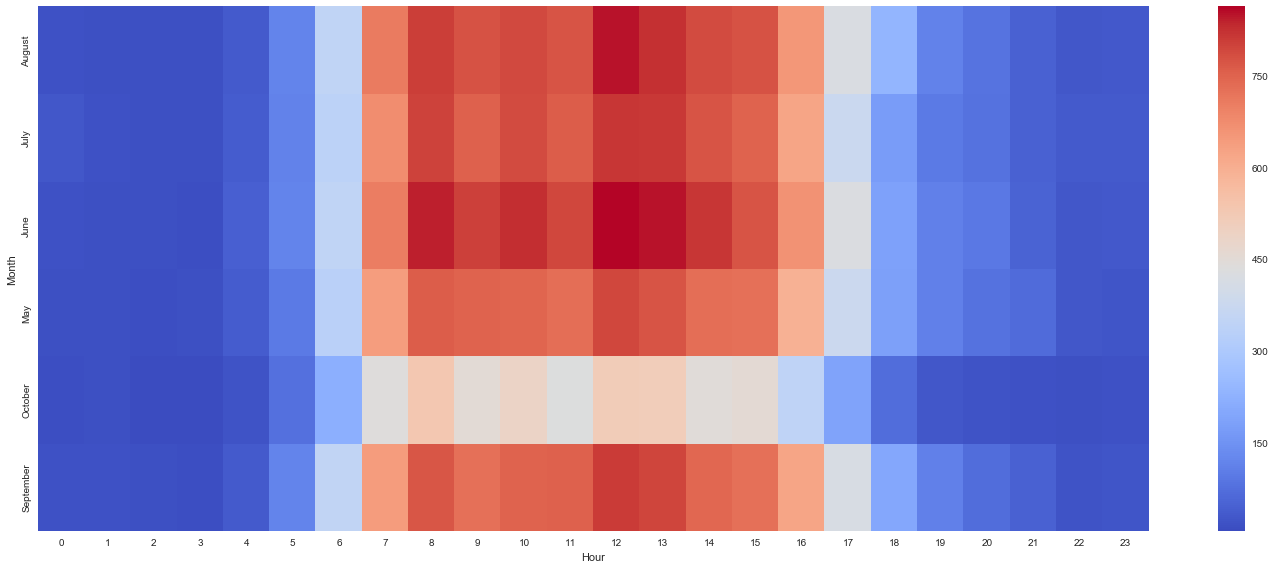

In [27]:
plt.figure(figsize=(20,8))
sns.heatmap(df.pivot_table(index = "Month",columns = "Hour", values= "Card Number", aggfunc = lambda x: len(x.unique())),cmap = "coolwarm")
plt.tight_layout()

## Campus wide Heat Map of unique card numbers by week and hour

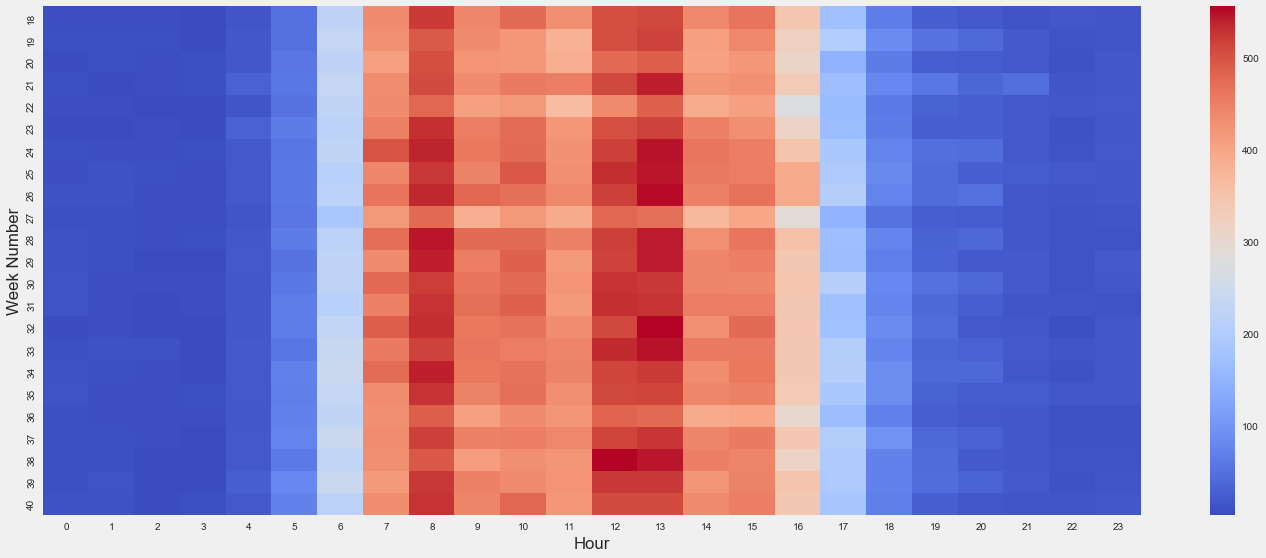

In [256]:
plt.figure(figsize=(20,8))
sns.heatmap(df.pivot_table(index = "Week Number",columns = "Hour", values= "Card Number", aggfunc = lambda x: len(x.unique())),cmap = "coolwarm")
plt.tight_layout()

## Unique ID's per Day

In [265]:
uniqueDay = df.pivot_table(index = "Date", values = "Card Number", aggfunc = lambda x: len(x.unique()))

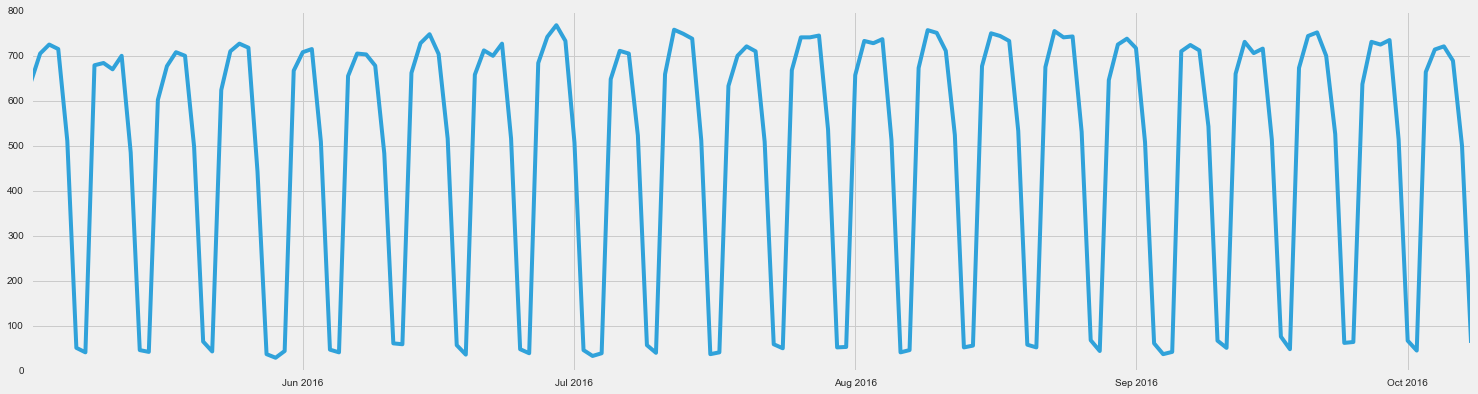

In [267]:
plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(20,5))
axes = fig.add_axes([0,0,1,1])
axes.plot(uniqueDay)

In [35]:
uniqueDay.mean()

478.42857142857144

In [266]:
uniqueDay = pd.DataFrame(uniqueDay)

In [425]:
z = []
for x in uniqueDay.reset_index()["Date"]:
    z.append(dayofweek[x.weekday()])

uniqueDay["Day of Week"] = z
uniqueDay.columns = ["Unique IDs", "Day of Week"]

In [427]:
os.chdir("/Users/adeniyiharrison/Desktop/Outlook Scheduling")
uniqueDay.to_csv("Unique ID by Day.csv")

## Unique ID's per Week

In [31]:
weekNum = []
for x in df.reset_index()["Clean DateTime"]:
    weekNum.append(x.week)
    
df["Week Number"] = weekNum

In [259]:
uniqueWeek = df.pivot_table(index = "Week Number", values = "Card Number", aggfunc = lambda x: len(x.unique()))

In [262]:
uniqueWeek.mean()

913.82608695652175

In [263]:
uniqueWeek = pd.DataFrame(uniqueWeek)

In [39]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [264]:
import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
    x=uniqueWeek.index,
    y=uniqueWeek["Card Number"],
#     text=uniqueWeek.index,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Unique Card Numbers By Week'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

In [268]:
trace0 = go.Bar(
    x=uniqueDay.index,
    y=uniqueDay["Card Number"],
    text=uniqueWeek.index,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Unique Card Numbers By Day'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')

### Group by Day of the Week

In [285]:
dayofweek ={
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
}

day = []
for x in df.reset_index()["Clean DateTime"]:
    day.append(dayofweek[x.weekday()])
    
df["Day of Week"] = day

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [301]:
dowCount = df.pivot_table(index = "Day of Week", aggfunc = lambda x: len(x.unique()), values = "Card Number" )

In [303]:
pd.DataFrame(dowCount)

,Card Number
Day of Week,
Friday,1186
Monday,1231
Saturday,379
Sunday,274
Thursday,1259
Tuesday,1242
Wednesday,1261


In [293]:
df.pivot_table(index = "Day of Week", aggfunc = lambda x: len(x.unique()), values = "Card Number" ).iplot(kind = "bar", title = "Unique ID Cards by Day of Week")

### Ranking Buildings by number of unique access points

In [342]:
accessPoints = []
for x in df["Building Code"].unique().tolist():
    accessPoints.append(len(df[df["Building Code"]== x]["Device Location"].unique().tolist()))

In [343]:
buildingPoints= pd.DataFrame(data = accessPoints, index = df["Building Code"].unique(), columns = ["Number of Access Points"]).sort("Number of Access Points",ascending = False)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [428]:
buildingPoints.head()

,Number of Access Points
RWTP,32
HQ,27
WQL,23
STWTP,19
ADM,16


### Unique IDs by Week in top 5 Buildings (Number of Access Points)

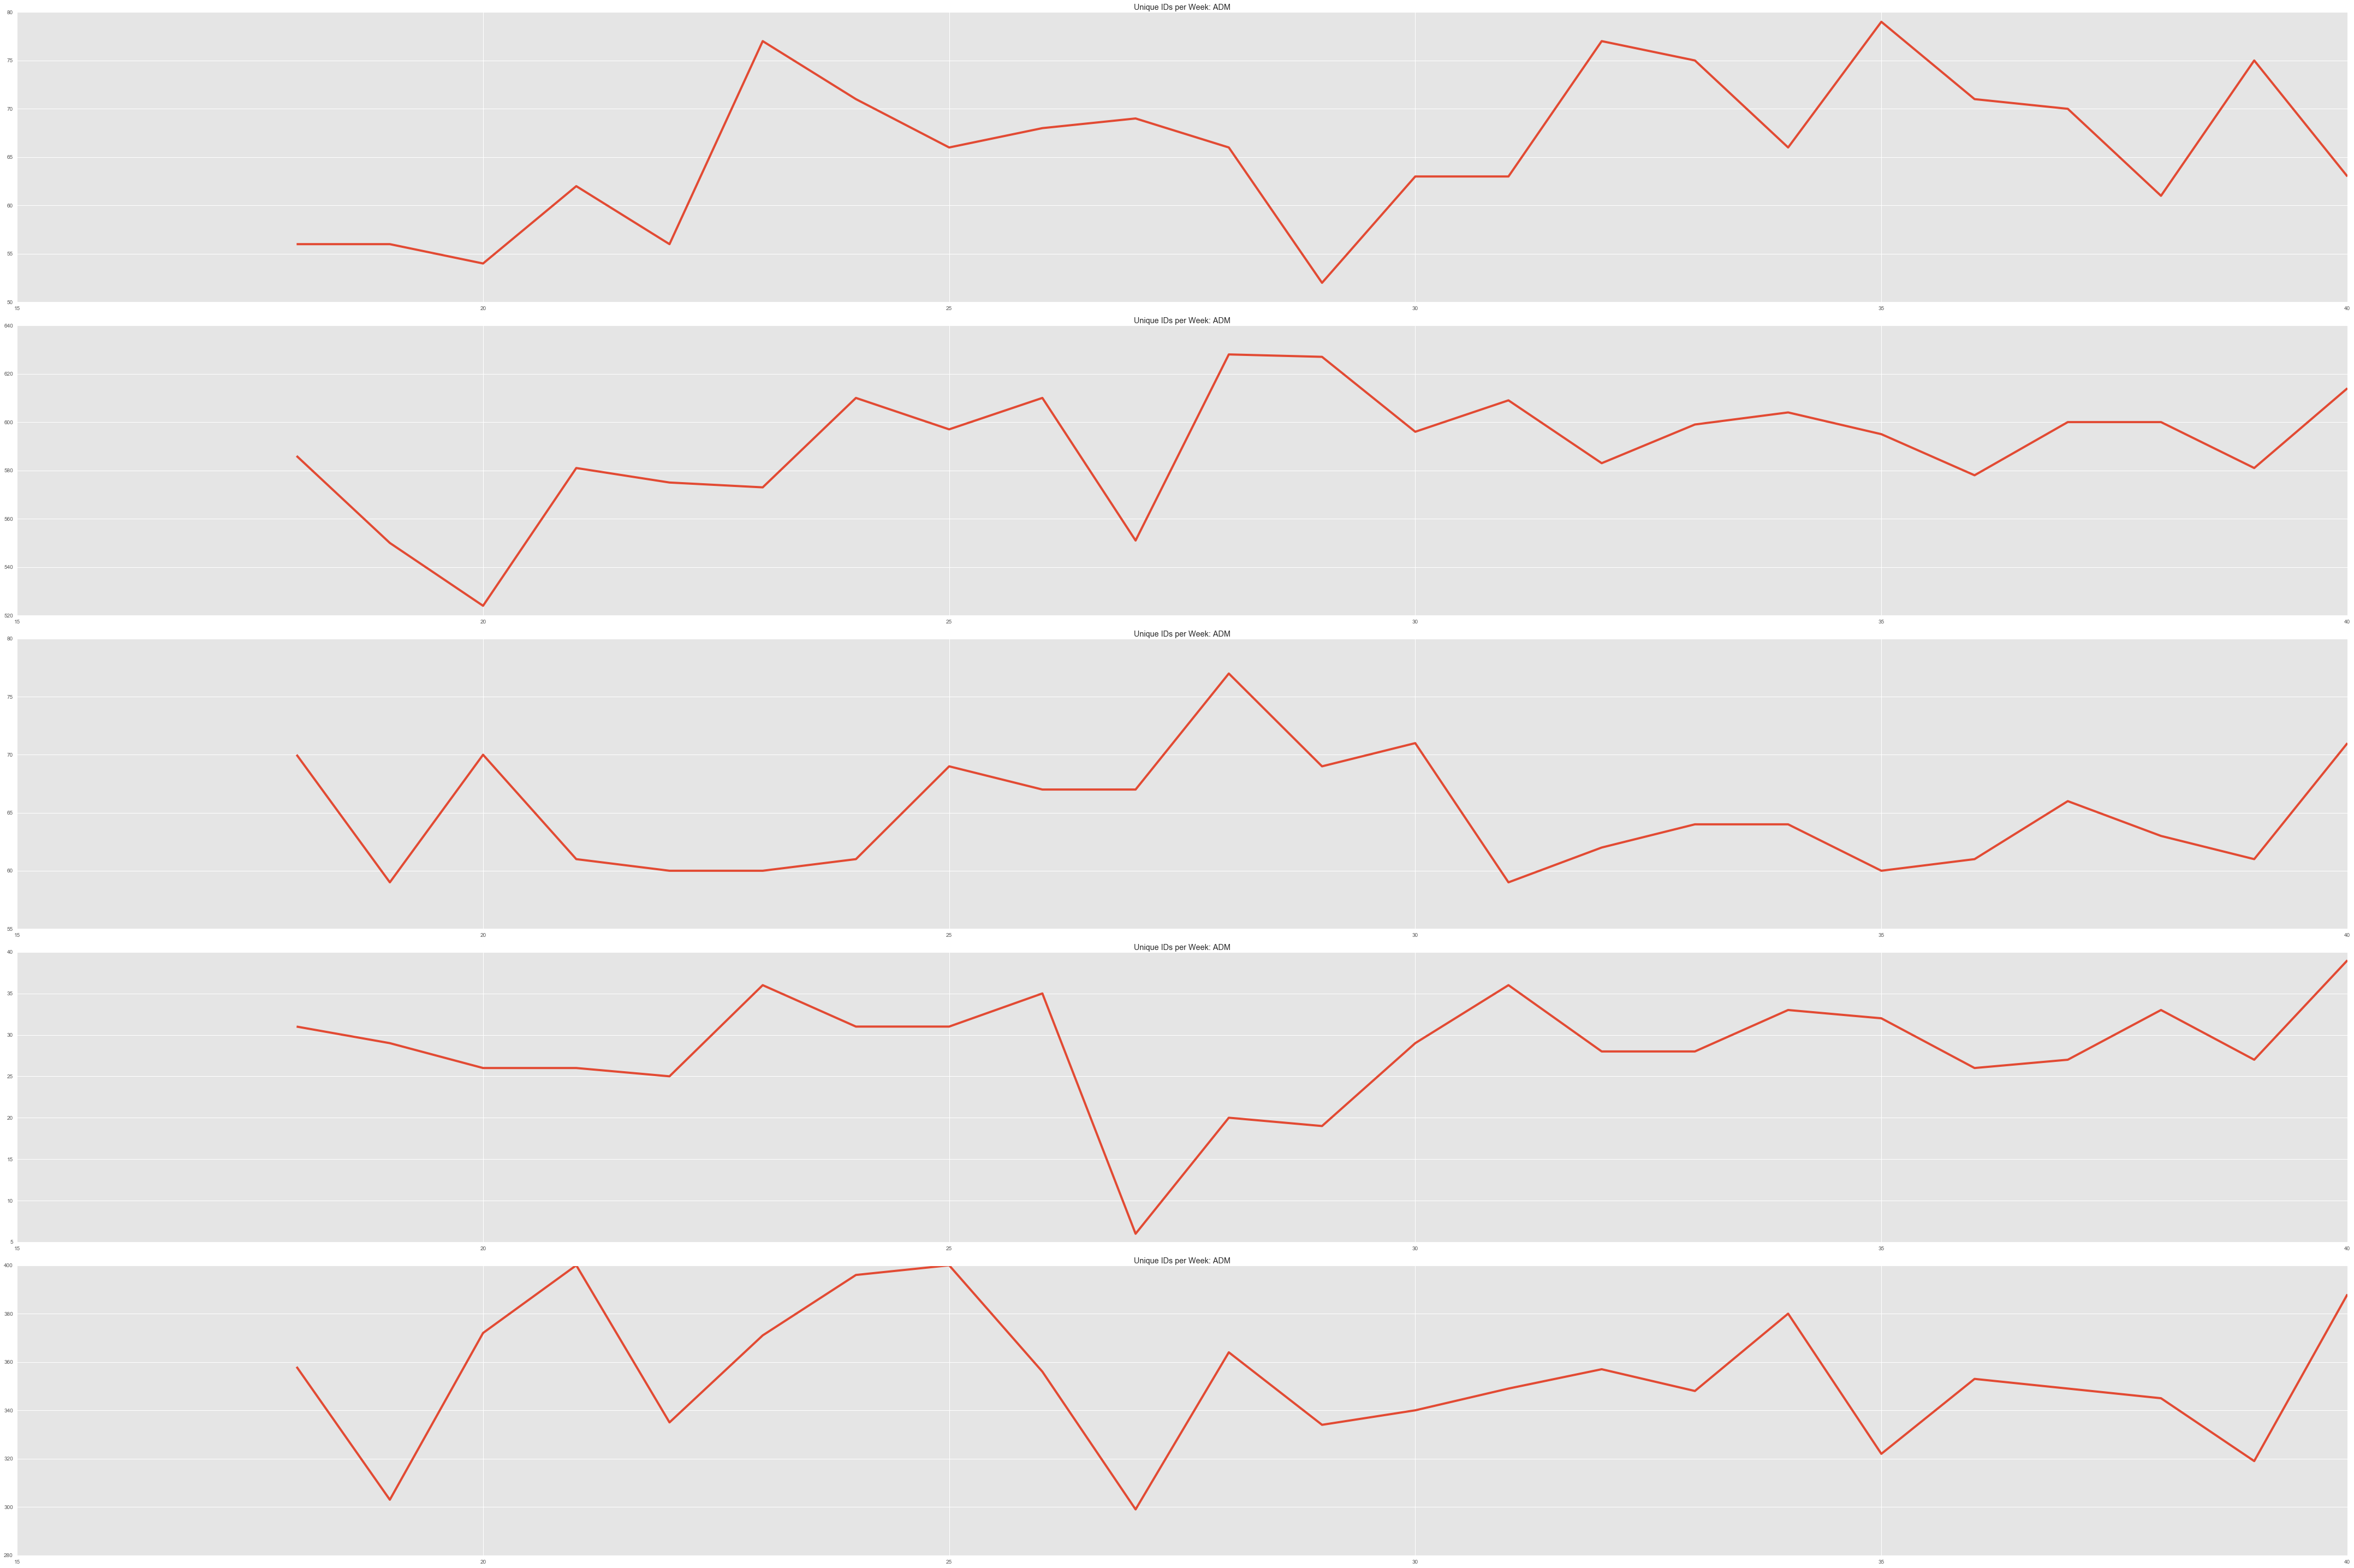

In [382]:
plt.style.use("ggplot")
num = 0
fig,axes = plt.subplots(nrows=5,ncols=1,figsize=(60,40))
for y in buildingPoints.index[:5]:
    axes[num].plot(df[df["Building Code"] == y].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
    axes[num].set_title("Unique IDs per Week: "+ x)
    num+=1

fig.tight_layout()

### Creating DataFrame for Unique ID's by Building 

In [399]:
RWTP = pd.DataFrame(df[df["Building Code"] == "RWTP"].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
RWTP.columns = ["RWTP"]

HQ = pd.DataFrame(df[df["Building Code"] == "HQ"].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
HQ.columns = ["HQ"]

WQL = pd.DataFrame(df[df["Building Code"] == "WQL"].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
WQL.columns = ["WQL"]

STWTP = pd.DataFrame(df[df["Building Code"] == "STWTP"].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
STWTP.columns = ["STWTP"]

ADM = pd.DataFrame(df[df["Building Code"] == "ADM"].pivot_table(index = "Week Number",values = "Card Number", aggfunc = lambda x: len(x.unique())))
ADM.columns = ["ADM"]

In [401]:
weeklyUnique = pd.concat([RWTP,HQ,WQL,STWTP,ADM],axis = 1)

In [455]:
weeklyUnique.iplot(kind="bar",size =16,bargap = .01,title = "Unique ID's by Building")

In [431]:
RWTP2 = pd.DataFrame(df[df["Building Code"] == "RWTP"].pivot_table(index = "Date",values = "Card Number", aggfunc = lambda x: len(x.unique())))
RWTP2.columns = ["RWTP"]

HQ2 = pd.DataFrame(df[df["Building Code"] == "HQ"].pivot_table(index = "Date",values = "Card Number", aggfunc = lambda x: len(x.unique())))
HQ2.columns = ["HQ"]

WQL2 = pd.DataFrame(df[df["Building Code"] == "WQL"].pivot_table(index = "Date",values = "Card Number", aggfunc = lambda x: len(x.unique())))
WQL2.columns = ["WQL"]

STWTP2 = pd.DataFrame(df[df["Building Code"] == "STWTP"].pivot_table(index = "Date",values = "Card Number", aggfunc = lambda x: len(x.unique())))
STWTP2.columns = ["STWTP"]

ADM2 = pd.DataFrame(df[df["Building Code"] == "ADM"].pivot_table(index = "Date",values = "Card Number", aggfunc = lambda x: len(x.unique())))
ADM2.columns = ["ADM"]

dailyUnique = pd.concat([RWTP2,HQ2,WQL2,STWTP2,ADM2],axis = 1)

In [453]:
dailyUnique.iplot(kind="bar",bargap = .03,size =16,title = "Unique ID's by Building")